# **Music Genre Classification**

# **1. Nạp dữ liệu**

## 1.1 Import thư viện

In [77]:
import numpy as np
import pandas as pd
from itables import show
import itables.options as opt
opt.maxBytes = 5000000

## 1.2 Load dữ liệu

In [78]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# **2. Tổng quan dữ liệu**

## 2.1 Quan sát dữ liệu

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

In [80]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  3600 non-null   int64  
 1   Artist Name         3600 non-null   object 
 2   Track Name          3600 non-null   object 
 3   Popularity          3505 non-null   float64
 4   danceability        3600 non-null   float64
 5   energy              3600 non-null   float64
 6   key                 3195 non-null   float64
 7   loudness            3600 non-null   float64
 8   mode                3600 non-null   int64  
 9   speechiness         3600 non-null   float64
 10  acousticness        3600 non-null   float64
 11  instrumentalness    2764 non-null   float64
 12  liveness            3600 non-null   float64
 13  valence             3600 non-null   float64
 14  tempo               3600 non-null   float64
 15  duration_in min/ms  3600 non-null   float64
 16  time_s

In [81]:
train.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [82]:
test.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
count,3600.000000,3505.000000,3600.000000,3600.000000,3195.000000,3600.000000,3600.000000,3600.000000,3600.000000,2764.000000,3600.000000,3600.000000,3600.000000,3.600000e+03,3600.000000
mean,16196.500000,44.459629,0.544744,0.664197,5.947105,-7.949879,0.622778,0.077813,0.248425,0.175336,0.197720,0.485527,122.335063,2.033447e+05,3.922778
std,1039.374812,17.461328,0.169257,0.233010,3.184676,4.016468,0.484759,0.076914,0.309510,0.303238,0.159040,0.243082,29.705640,1.131593e+05,0.369936
min,14397.000000,1.000000,0.064600,0.000020,1.000000,-34.797000,0.000000,0.022700,0.000001,0.000001,0.014400,0.018300,48.718000,9.871167e-01,1.000000
25%,15296.750000,33.000000,0.430000,0.512000,3.000000,-9.532500,0.000000,0.034800,0.004488,0.000093,0.098575,0.291000,98.515750,1.688360e+05,4.000000
50%,16196.500000,44.000000,0.549000,0.703000,6.000000,-7.043500,1.000000,0.048750,0.080850,0.003755,0.131000,0.481000,120.091000,2.103355e+05,4.000000
75%,17096.250000,56.000000,0.664000,0.859000,9.000000,-5.282250,1.000000,0.082800,0.441250,0.197250,0.265250,0.674000,141.846750,2.533958e+05,4.000000
max,17996.000000,97.000000,0.970000,0.999000,11.000000,1.355000,1.000000,0.886000,0.996000,0.973000,1.000000,0.984000,214.396000,1.412451e+06,5.000000


In [83]:
train.shape

(14396, 18)

In [84]:
test.shape

(3600, 17)

In [85]:
show(train)

Loading ITables v2.5.2 from the internet... (need help?)


## 2.2 Kiểm tra dữ liệu thiếu

In [86]:
for name, sum in train.isna().sum().items():
    if sum > 0:
        print(f'{name}: {sum}')


Popularity: 333
key: 1609
instrumentalness: 3541


### Hướng giải quyết dữ liệu thiếu:

In [87]:
train[['Popularity','key','instrumentalness']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Popularity        14063 non-null  float64
 1   key               12787 non-null  float64
 2   instrumentalness  10855 non-null  float64
dtypes: float64(3)
memory usage: 337.5 KB


***Tất cả đều có type là float => sử dụng median để lắp vào dữ liệu thiếu.***

# **3. Trực quan hóa dữ liệu**

## 3.1 Phân tích đơn biến

- Vì ID,Artist Name, Track Name là giá trị rời rạc => drop khỏi dataset để trực quan hóa dữ liệu

In [90]:
train.drop(['Id', 'Artist Name', 'Track Name'], axis=1, inplace=True)

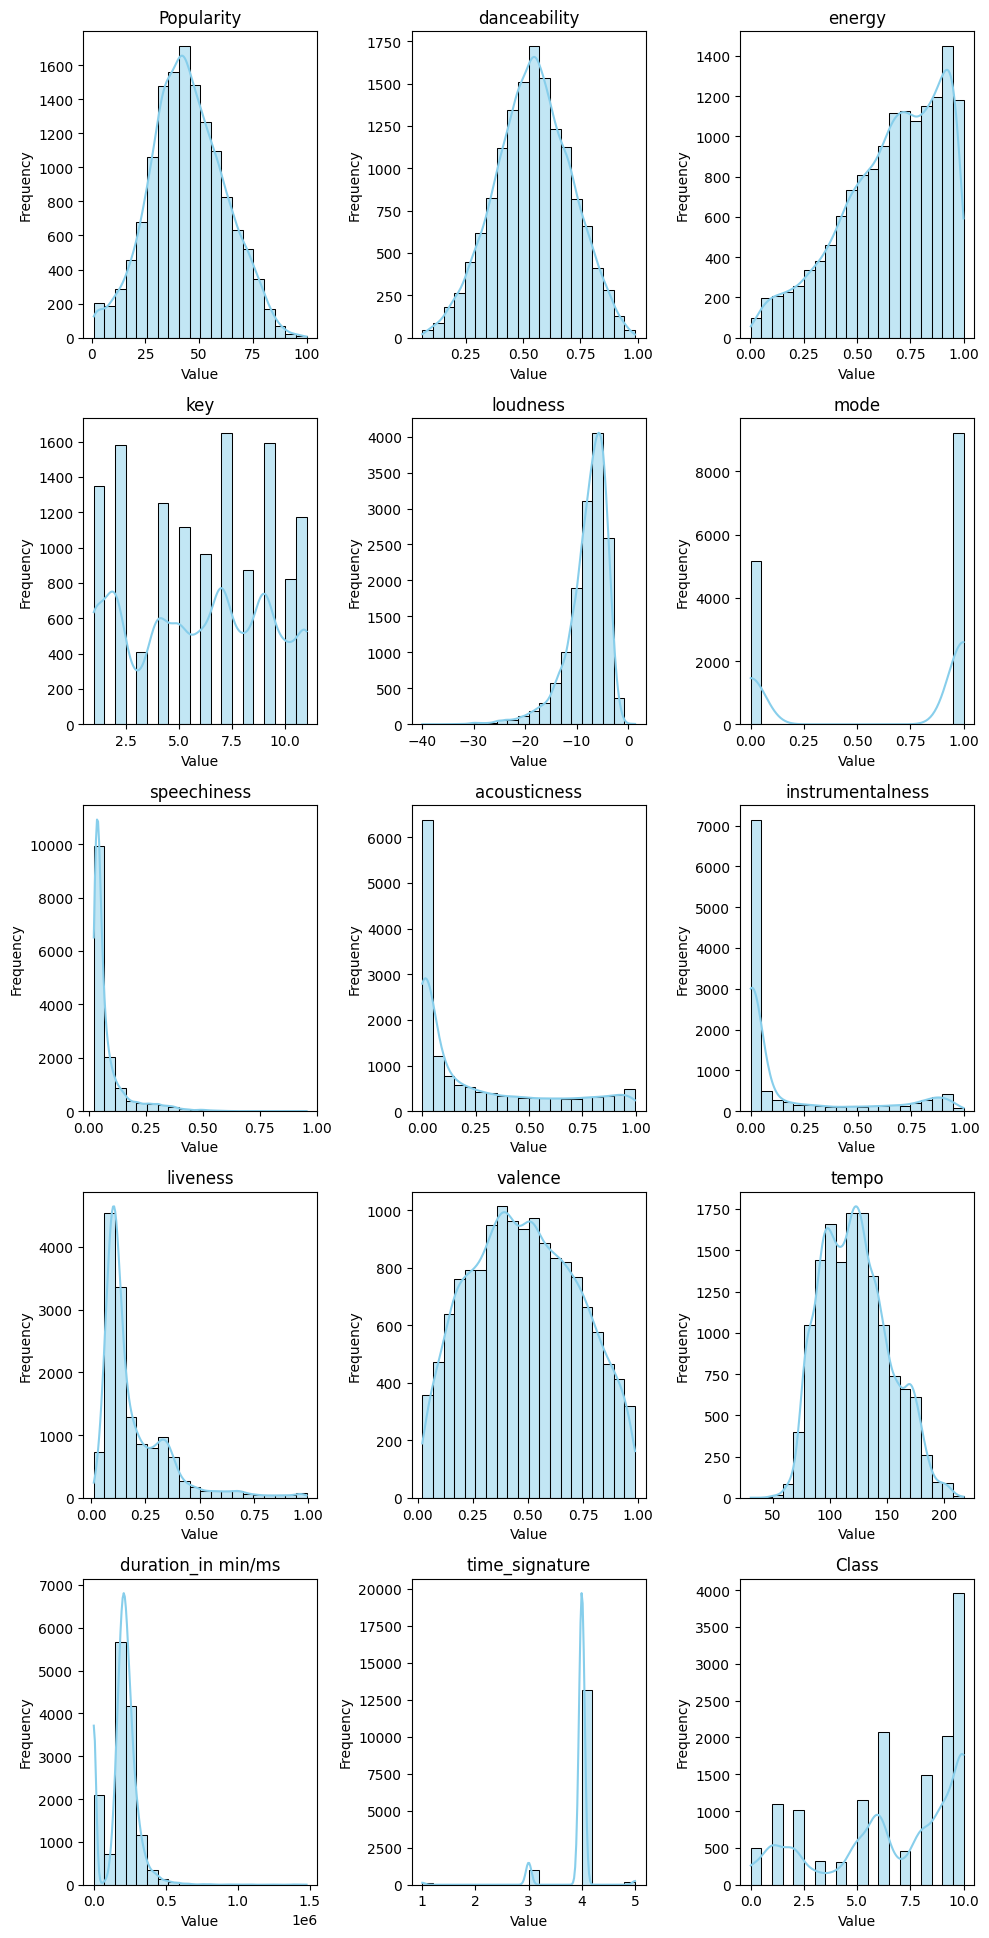

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
fig , axes = plt.subplots(13, 3, figsize=(10,50))
axes = axes.flatten()
for ax, col in zip(axes, train.columns):
    sns.histplot(train[col], bins=20, kde=True, color='skyblue', edgecolor='black', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
for ax in axes[len(train.columns):]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.savefig("../graphs/fig_hist_numerical_columns.png")
plt.show()

- Các  đặc trưng có phân phối gần chuẩn:

    - danceability, valence và tempo có hình dạng quả chuông khá rõ ràng. tempo tập trung quanh mức 120 BPM (phổ biến cho nhạc pop/rock), và valence phân bố khá đều.

    - Có thể sử dụng phương pháp chuẩn hóa tiêu chuẩn (Standard Scaler / Z-score).

- Các đặc trưng có phân phối lệch (Skewed):

    - speechiness, acousticness, instrumentalness, và liveness bị lệch phải (right-skewed) rất nặng. Hầu hết giá trị tập trung gần số 0 và có phần đuôi dài về phía bên phải.

    - loudness và energy bị lệch trái (left-skewed), nghĩa là đa số các bài hát đều to và giàu năng lượng, rất ít bài yên tĩnh.

    - Các đặc trưng này nên được xử lý bằng biến đổi Log hoặc Box-Cox để đưa về dạng gần chuẩn hơn trước khi đưa vào các mô hình như Hồi quy tuyến tính.

- Quan sát các Đặc trưng Cụ thể

    - instrumentalness: Cực kỳ lệch. Đại đa số các bài hát có giá trị gần 0, chỉ một lượng rất nhỏ nằm rải rác hoặc gần 1.0 có thể là do 3541 dữ liệu thiếu.

    - time_signature: Về mặt kỹ thuật là số, nhưng hoạt động như biến phân loại. Giá trị 4 (nhịp 4/4) chiếm ưu thế tuyệt đối và vì phương sai thấp nên có thể không mang lại nhiều giá trị dự báo (có thể xóa hoặc xem như biến phân loại)

    - mode: Đây là đặc trưng nhị phân (0 hoặc 1).

- Phân tích Biến mục tiêu (Class)

    - Phân phối: Các lớp không đồng đều.

    - Lớp 10 xuất hiện nhiều nhất.

    - Lớp 5 và 9 có tần suất trung bình.

    - Lớp 1, 2, 3 là các lớp thiểu số (rất ít dữ liệu).

### Kiểm tra ngoại lệ với boxplot

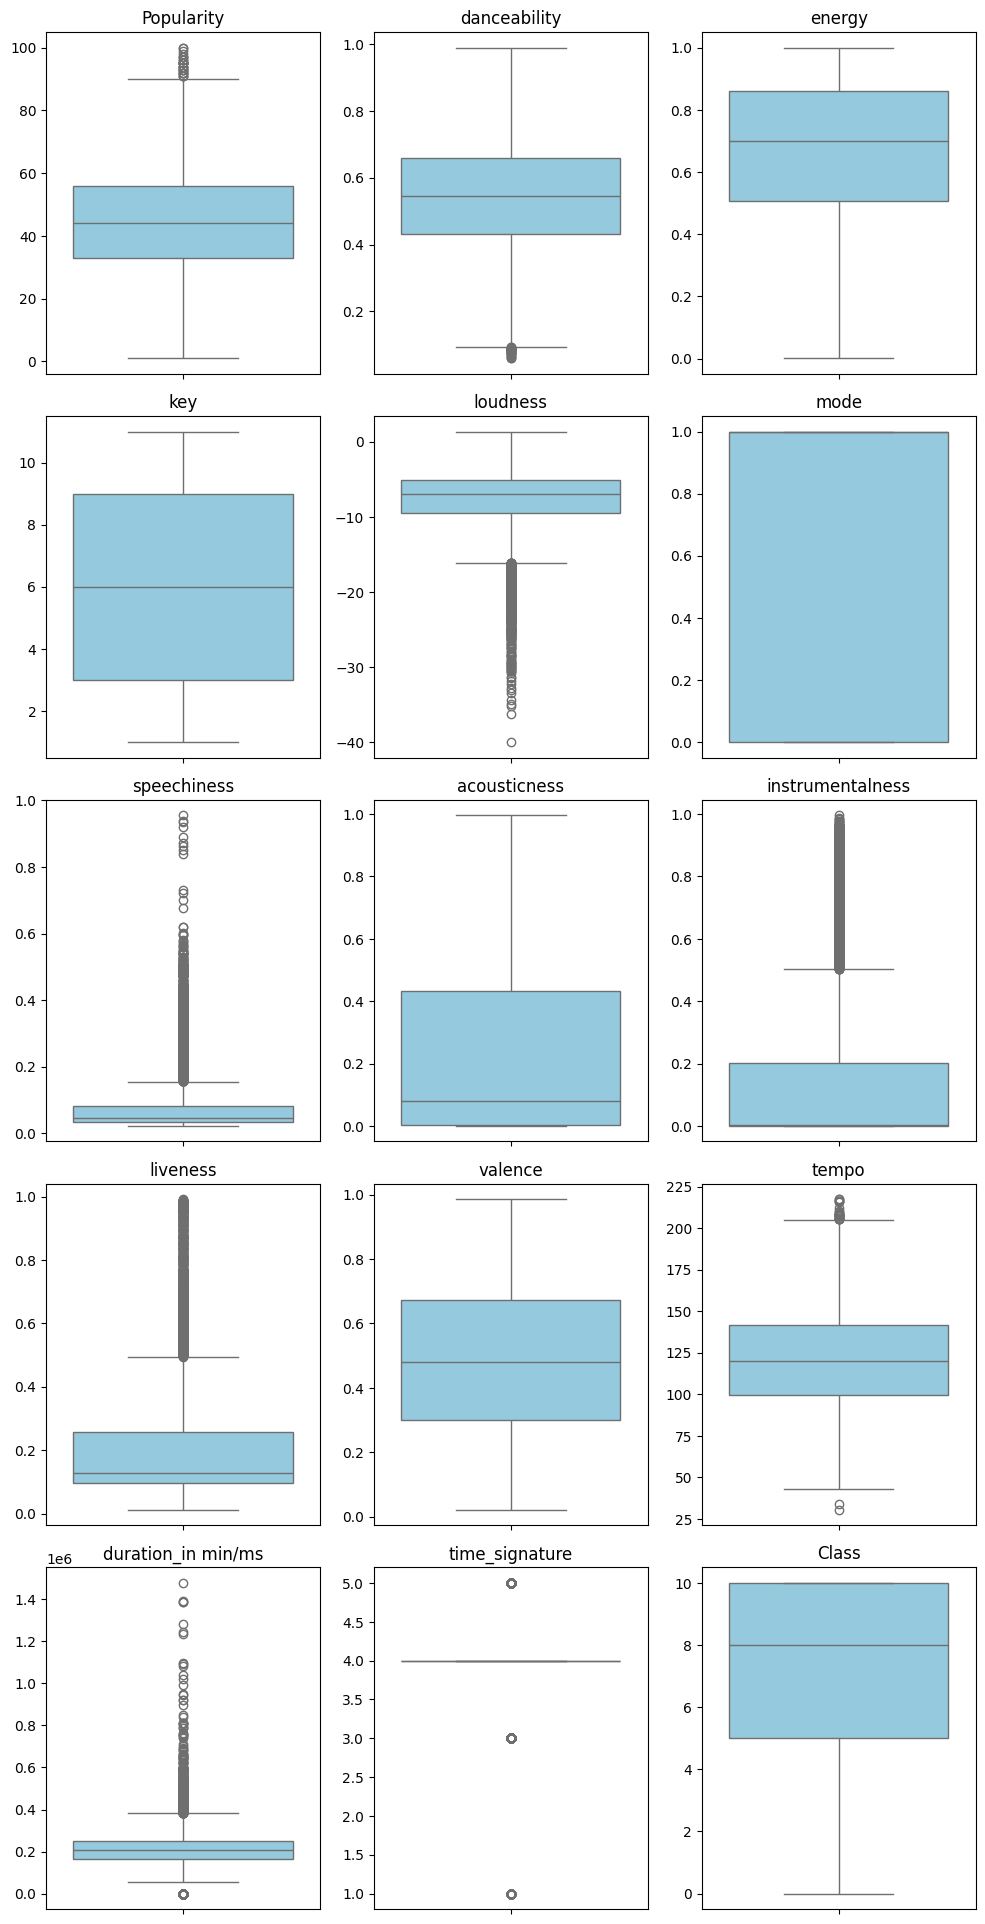

In [92]:
fig , axes = plt.subplots(13, 3, figsize=(10,50))
axes = axes.flatten()
for ax, col in zip(axes, train.columns):
    sns.boxplot(train[col], color='skyblue', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
for ax in axes[len(train.columns):]:
    ax.set_visible(False)
    
plt.tight_layout()
plt.savefig("../graphs/fig_boxplt_numerical_columns.png")
plt.show()

Ngoại lai cực đoan ("Dải chấm đen dày đặc"):

Cột: speechiness, instrumentalness, liveness, duration.

Nhận xét: Hộp (box) bị ép bẹp dí xuống dưới, còn các chấm đen kéo thành vệt dài phía trên.

=> Dữ liệu bị lệch rất nặng. Đa số bài hát có chỉ số này gần bằng 0, nhưng vẫn tồn tại một nhóm nhỏ các bài hát có chỉ số rất cao (ví dụ: bài hát dài 20 phút hoặc bài thuần nhạc cụ). Đây là đặc trưng tự nhiên của dữ liệu âm nhạc.

Ngoại lai một chiều:

Cột: loudness.

Nhận xét: Chỉ xuất hiện ngoại lai ở phía dưới (giá trị âm lớn).

=> Hầu hết nhạc đều to, chỉ có một số ít bài rất nhỏ/tĩnh lặng.

Ngoại lai "giả":

Cột: time_signature.

Nhận xét: Chỉ có một vạch ngang, các điểm khác đều là chấm đen. Vì 99% bài hát là nhịp 4/4, nên bất kỳ nhịp nào khác (3, 5, 1) đều bị thuật toán coi là ngoại lai.

# **Độ tương quan:**

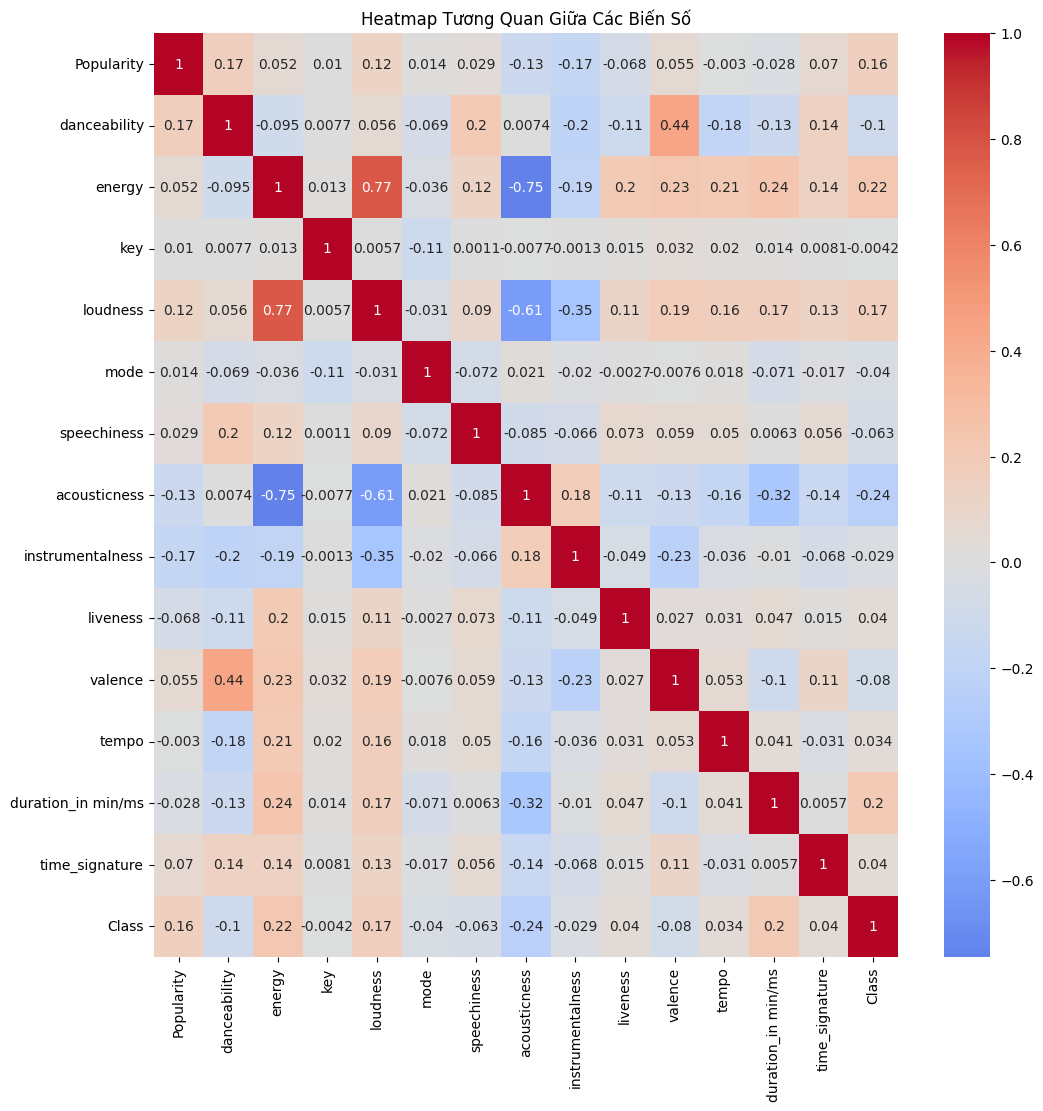

In [96]:
# Tính ma trận tương quan
corr = train.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Tương Quan Giữa Các Biến Số')
plt.savefig("../graphs/fig_numerical_cor.png")
plt.show()

**1. Energy và Loudness (Tương quan: 0.77)**

- Cặp có tương quan dương mạnh nhất. Nhạc càng to (Loudness) thì thường càng nhiều năng lượng (Energy).

**2. Energy và Acousticness (Tương quan: -0.75)**

- Cặp tương quan âm mạnh nhất. Nhạc càng nhiều năng lượng thì tính mộc (Acousticness) càng thấp và ngược lại.

**3. Danceability và Valence (Tương quan: 0.44)**

- Tuy không có tương quan mạnh nhưng mà Valence (độ tích cực) và Danceability (Khả năng nhảy) cũng có một chút kết hợp về logic.